# $\underline{\text{SONORA}}$

$\text{En este notebook se contendran el analisis de las estaciones meteorologicas}$ 

$\text{elegidas para el estado de sonora.}$

$\text{A continuacion se enlistaran cuales son las elegidas:}$

$\text{-26022 (Agua Prieta)}$

$\text{-26062 (Nogales)}$

$\text{-26068 (Presa Alvaro Obregon)}$

$\text{-26096 (Sonoita)}$

$\text{-26139 (Hermosillo)}$

$\text{-26179 (Bahia de Kino)}$

$\text{Se considero el tomar estaciones de manera que se cubriera en general toda la region de sonora,}$

$\text{para asi tener una idea mejor de la precipitacion a lo largo de todo el territorio.}$

In [2]:
#Importando las bibliotecas a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# $\text{26022 (Agua Prieta)}$


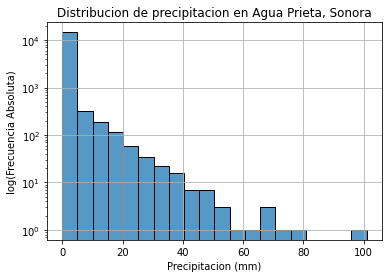

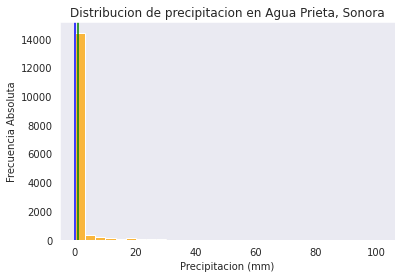

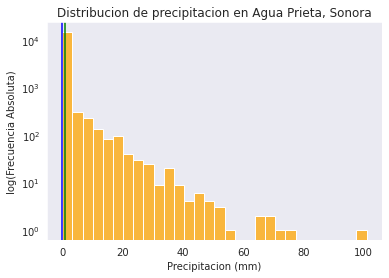

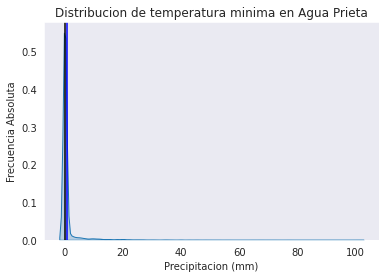

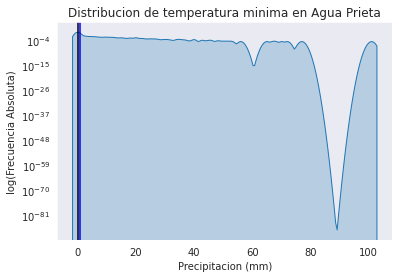




DISTRIBUCION DE LOS DATOS A LO LARGO DE LOS ANOS




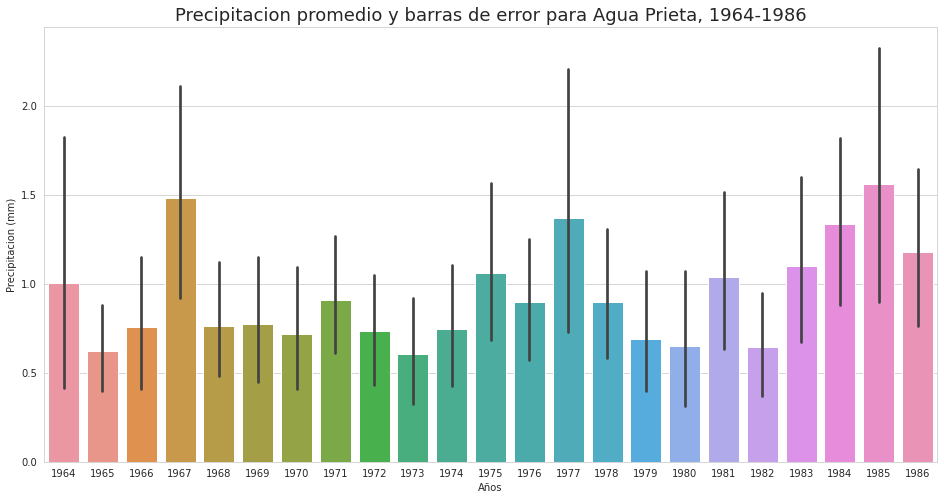

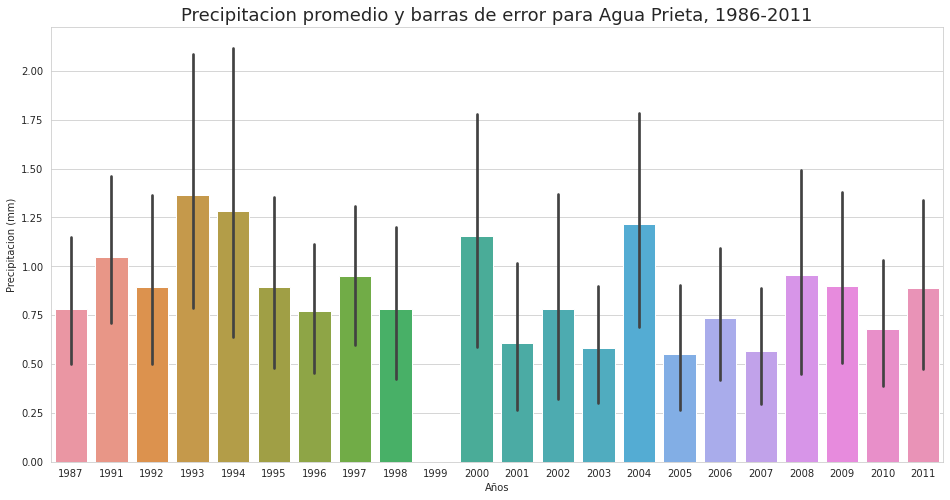

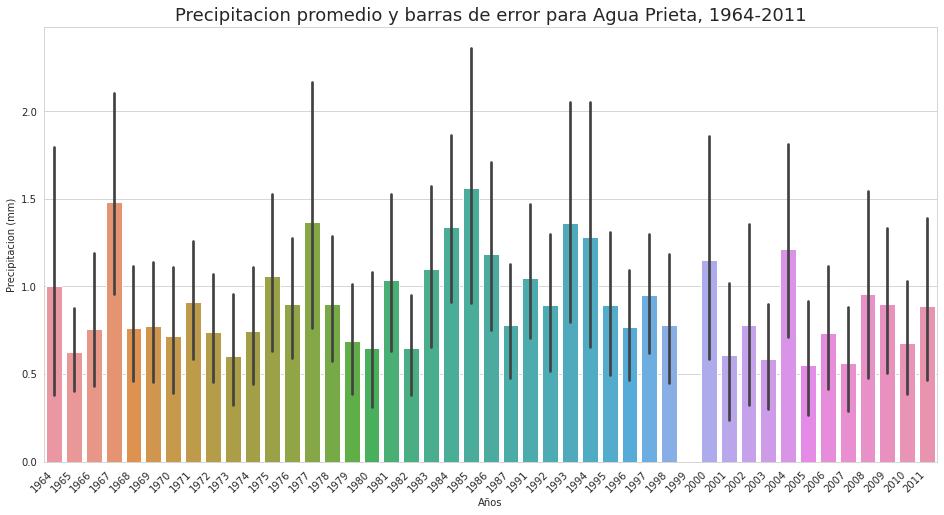

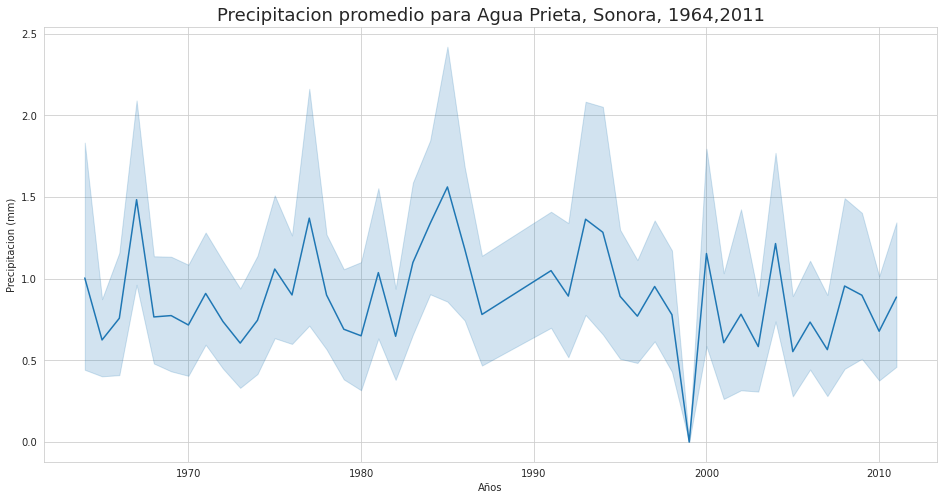

In [3]:
#===================LIMPIANDO Y PREPARANDO LOS DATOS===================================================

#==========CREANDO UN DF DEL ARCHIVO DE DATOS Y UN DF PROVICIONAL DE TRABAJO====================
# Creamos un DataFrame compra a partir del archivo de texto de los datos diarios de la estacion en nuestro repositorio:

urlAguaPrieta = "https://raw.githubusercontent.com/Refer-MF/Investigacion---Patrones-de-precipitacion/master/Mexico/Noroeste%20de%20Mexico/Sonora/Datos%20Diarios%2026022%20(Agua%20Prieta).txt"
#La URL del archivo de datos que esta guardado en mi repositorio de GH
encabezadosAP=['Fecha','Precip','Evap','Tmax','Tmin'] #Encabezados de las columnas, de acuerdo al archivo que se leera

df_datAP=pd.read_csv(urlAguaPrieta,names=encabezadosAP,encoding='cp1251',sep='\s+',header=None,skiprows=19,skipfooter=1,engine='python')

#print(df_datAP.head(10))
#print(df_datAP.tail(10))
#df_datAP.shape #Se tiene una forma de (15428,5)
#df_datAP.info()


df_datAP0=df_datAP.copy()
#Cambiando 'Nulo' por ' '
str_nulo='Nulo'
df_datAP1=df_datAP0.replace(to_replace=str_nulo,value=' ',regex=True)
#df_datAP1.tail(10)

#=====PASANDO LOS DATOS A NUMERICOS=====================

cols_list=['Precip','Evap','Tmax','Tmin'] #Un diccionario que usaremos para analizar el df en un loop for
for cols in cols_list:
  df_datAP1[cols]=pd.to_numeric(df_datAP1[cols], errors='coerce')


#df_datAP1.info() #Podemos ver que en precipitacion solo faltan 13 valores


#========ANALISIS ESTADISTICO INICIAL====================
#df_datAP1.describe()

#============CAMBIANDO EL FORMATO DE LAS FECHAS============

df_datAP2=df_datAP1.copy()
df_datAP2['Fecha']=pd.to_datetime(df_datAP2['Fecha'],dayfirst=True).copy()
#df_datAP2.head()
#df_datAP2.dtypes

df_datAP2['Año']=df_datAP2['Fecha'].dt.year #Anadiendo una columna de años al df

#df_datAP2.head()
#df_datAP2.tail()

#df_datAP2.info()

df_datAP3=df_datAP2.copy()

#================================HACIENDO EL ANALISIS ESTADISTICO DE PRECIPITACION===============

#==========HISTOGRAMAS INICIALES========================
#plt.hist(df_datAP3.Precip,bins=20)
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('Frecuencia Absoluta')
#plt.title('Distribucion de precipitacion en Agua Prieta, Sonora')
#plt.grid()
#plt.show()

#Lo pasaremos a escala logaritmica, para apreciar mejor los datos. 
HistogramaAPSolo=sns.histplot(data=df_datAP3.Precip,bins=20,log_scale=(False,True))
HistogramaAPSolo.set(xlabel='Precipitacion (mm)',ylabel='log(Frecuencia Absoluta)')
#plt.yscale('log')
#plt.ylabel('Frecuencia Absoluta')
plt.title('Distribucion de precipitacion en Agua Prieta, Sonora')
plt.grid()
plt.show()

#Ahora vamos a graficar el histograma pero con la funcion de probabilidad acumulada
sns.set_style("darkgrid")

PrecMediAP=df_datAP3.Precip.median()
PrecMeanAP=df_datAP3.Precip.mean()

HistDstAcumAP=sns.histplot(df_datAP3['Precip'],kde=False,color='orange',bins=30,)#log_scale=(False,True))

plt.axvline(x=PrecMediAP,color='b',label='Mediana')
plt.axvline(x=PrecMeanAP,color='g',label='Media')

HistDstAcumAP.set(xlabel='Precipitacion (mm)',ylabel='Frecuencia Absoluta')
plt.title('Distribucion de precipitacion en Agua Prieta, Sonora')
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#Y ahora con la escala logaritmica
sns.set_style("darkgrid")

PrecMediAP=df_datAP3.Precip.median()
PrecMeanAP=df_datAP3.Precip.mean()

HistDstAcumAPLog=sns.histplot(df_datAP3['Precip'],kde=False,color='orange',bins=30,log_scale=(False,True))

plt.axvline(x=PrecMediAP,color='b',label='Mediana')
plt.axvline(x=PrecMeanAP,color='g',label='Media')

HistDstAcumAPLog.set(xlabel='Precipitacion (mm)',ylabel='log(Frecuencia Absoluta)')

plt.title('Distribucion de precipitacion en Agua Prieta, Sonora')
#plt.xlabel('Precipitacion (mm)')
#plt.yscale('log')
#plt.ylabel('log(Frecuencia Absoluta)')
plt.grid()
plt.show()

#Como podemos ver, esto indica a que casi nunca llueve en Agua Prieta

#=================DISTRIBUCION DE PROBABILIDAD SOLA===================
#Ahora graficaremos la distribucion de probabilidad sola sin el histograma:

#Sin escala logaritmica
sns.set_style('darkgrid')

DstAcumuladaAP=sns.kdeplot(df_datAP3.Precip,fill=True)

plt.axvline(x=PrecMediAP,color='black',label='Mediana')
plt.axvline(x=PrecMeanAP,color='blue',label='Media')

DstAcumuladaAP.set(xlabel='Precipitacion (mm)',ylabel='Frecuencia Absoluta')

plt.title('Distribucion de temperatura minima en Agua Prieta')
#plt.yscale('log')
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#Con escala logaritmica
sns.set_style('darkgrid')

DstAcumLogAP=sns.kdeplot(df_datAP3.Precip,fill=True)

plt.axvline(x=PrecMediAP,color='black',label='Mediana')
plt.axvline(x=PrecMeanAP,color='blue',label='Media')

DstAcumLogAP.set(xlabel='Precipitacion (mm)',ylabel='log(Frecuencia Absoluta)')


plt.title('Distribucion de temperatura minima en Agua Prieta')
plt.yscale('log')
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('log(Frecuencia Absoluta)')
plt.grid()
plt.show()

print('\n==========================================')
print('\n==========================================')
print('\nDISTRIBUCION DE LOS DATOS A LO LARGO DE LOS ANOS')
print('\n===========================================')
print('\n===========================================')

#====================SELECCIONANDO CONJUNTOS DE DATOS===================
df_AP23=df_datAP3[(df_datAP3['Año']>=1964)&(df_datAP3['Año']<1987)] #23 anos de datos
df_AP24=df_datAP3[(df_datAP3['Año']>=1987)&(df_datAP3['Año']<2012)] #24 anos de datos
df_AP47=df_datAP3[(df_datAP3['Año']>=1964)&(df_datAP3['Año']<2012)] #47 anos de datos

#============GRAFICANDO LOS DF ANTES CREADOS==========================

#-------------------PERIODO 1964-1987--------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar23=sns.barplot(x='Año', y='Precip',data=df_AP23)
PrecipBar23.set(xlabel='Años',ylabel='Precipitacion (mm)')
#plt.xlabel=('Años')
#plt.ylabel=('Precipitacion (mm)')
plt.title('Precipitacion promedio y barras de error para Agua Prieta, 1964-1986', fontsize=18)
#Rotamos 45º los Años en el eje x para mejor lectura
#PrecipBar47.set_xticklabels(PrecipBar47.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

#-------------------PERIODO 1987-2011--------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar24=sns.barplot(x='Año', y='Precip',data=df_AP24)
PrecipBar24.set(xlabel='Años',ylabel='Precipitacion (mm)')
#plt.xlabel=('Años')
#plt.ylabel=('Precipitacion (mm)')
plt.title('Precipitacion promedio y barras de error para Agua Prieta, 1986-2011', fontsize=18)
#Rotamos 45º los Años en el eje x para mejor lectura
#PrecipBar47.set_xticklabels(PrecipBar47.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

#----------------------------PERIODO TOTAL-----------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar47=sns.barplot(x='Año', y='Precip',data=df_AP47)
PrecipBar47.set(xlabel='Años',ylabel='Precipitacion (mm)')
#plt.xlabel=('Años')
#plt.ylabel=('Precipitacion (mm)')
plt.title('Precipitacion promedio y barras de error para Agua Prieta, 1964-2011', fontsize=18)
#Rotamos 45º los Años en el eje x para mejor lectura
PrecipBar47.set_xticklabels(PrecipBar47.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()



#==========GRAFICAS DE LINEAS=========================

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipLine47=sns.lineplot(x='Año', y='Precip', data=df_AP47)
PrecipLine47.set(xlabel='Años',ylabel='Precipitacion (mm)')

plt.title('Precipitacion promedio para Agua Prieta, Sonora, 1964,2011',fontsize=18)
plt.show()

#Aqui terminamos con el analisis de la precipitacion en Agua Prieta, se prosiguira con un analisis de la temperatura en un tiempo despues.


# $\text{26062 (Nogales)}$

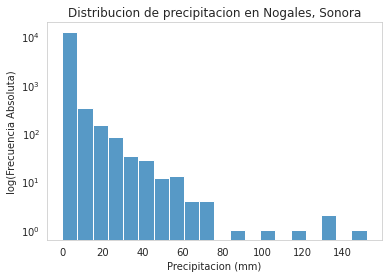

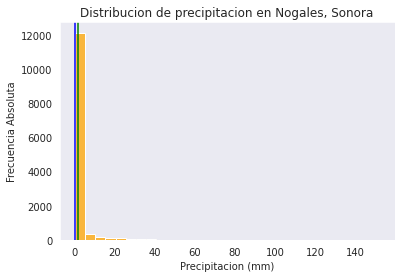

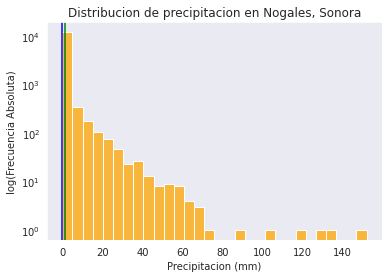

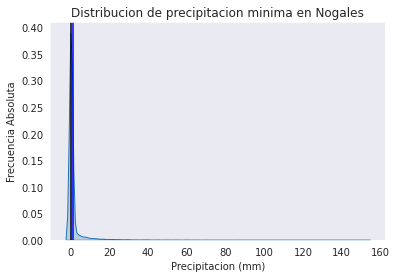

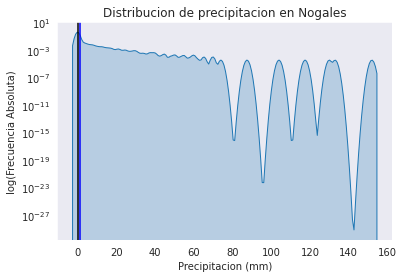




DISTRIBUCION DE LOS DATOS A LO LARGO DE LOS ANOS




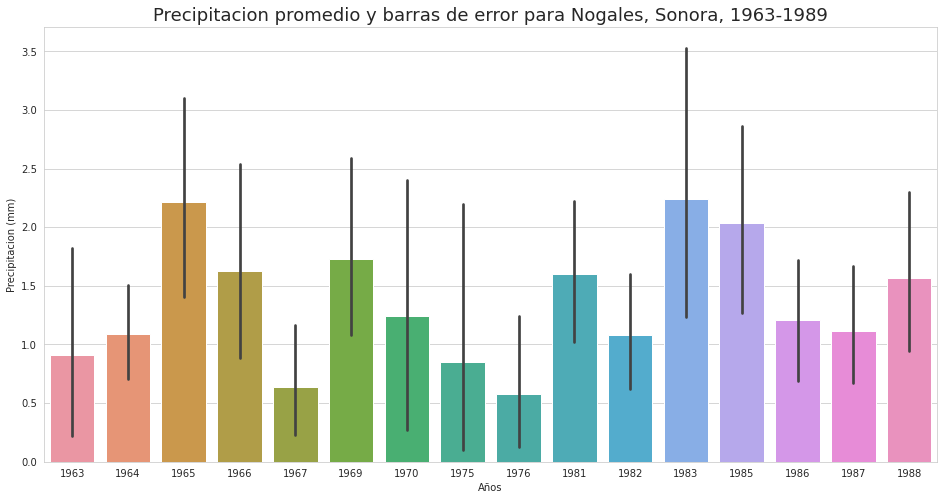

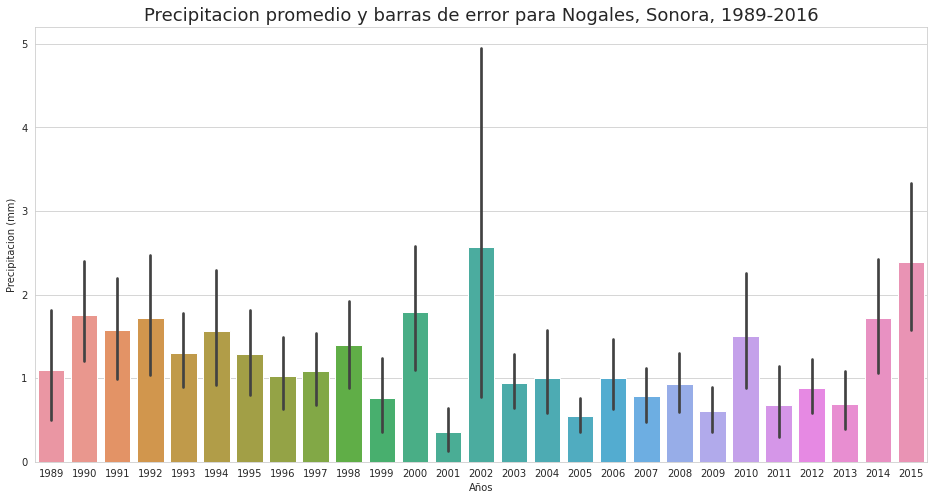

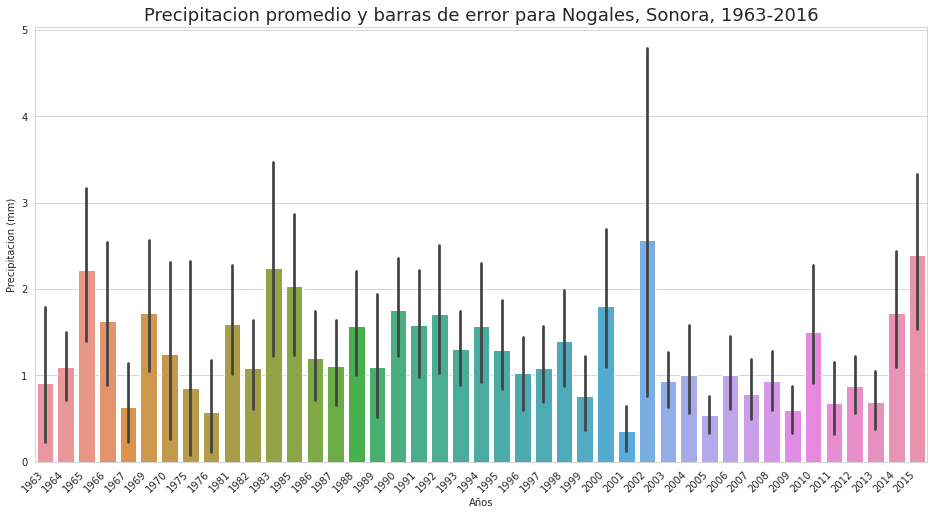

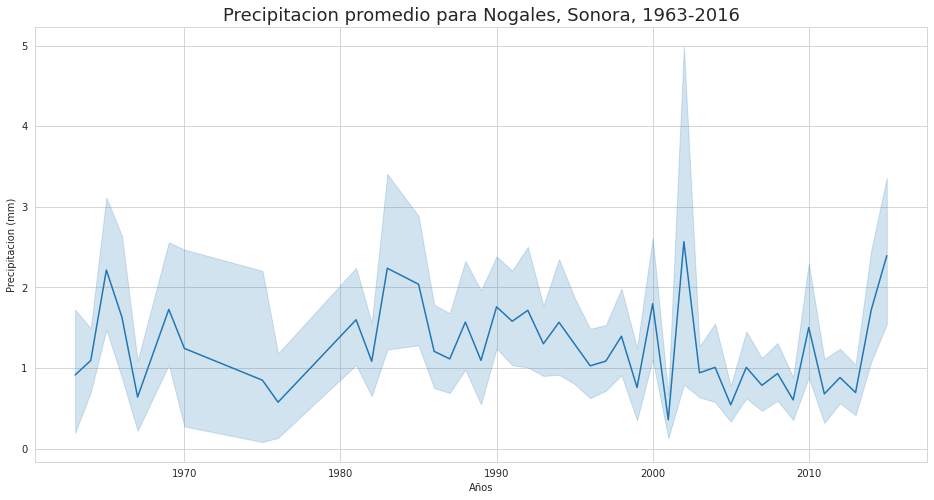

In [ ]:
#===================LIMPIANDO Y PREPARANDO LOS DATOS===================================================

#==========CREANDO UN DF DEL ARCHIVO DE DATOS Y UN DF PROVICIONAL DE TRABAJO====================
# Creamos un DataFrame compra a partir del archivo de texto de los datos diarios de la estacion en nuestro repositorio:

urlNogales = "https://raw.githubusercontent.com/Refer-MF/Investigacion---Patrones-de-precipitacion/master/Mexico/Noroeste%20de%20Mexico/Sonora/Datos%20Diarios%2026062%20(Nogales%20Sonora).txt"
#La URL del archivo de datos que esta guardado en mi repositorio de GH
encabezadosNog=['Fecha','Precip','Evap','Tmax','Tmin'] #Encabezados de las columnas, de acuerdo al archivo que se leera

df_datNog=pd.read_csv(urlNogales,names=encabezadosNog,encoding='cp1251',sep='\s+',header=None,skiprows=19,skipfooter=1,engine='python')

#print(df_datNog.head(10))
#print(df_datNog.tail(10))
#df_datNog.shape #Se tiene una forma de (13013,5)
#df_datNog.info()

df_datNog0=df_datNog.copy()
#Cambiando 'Nulo' por ' '
str_nulo='Nulo'
df_datNog1=df_datNog0.replace(to_replace=str_nulo,value=' ',regex=True)
#df_datNog1.tail(10)

#=====PASANDO LOS DATOS A NUMERICOS=====================

cols_list=['Precip','Evap','Tmax','Tmin'] #Un diccionario que usaremos para analizar el df en un loop for
for cols in cols_list:
  df_datNog1[cols]=pd.to_numeric(df_datNog1[cols], errors='coerce')


#df_datNog1.info() #Podemos ver que en precipitacion solo faltan 7 valores

#========ANALISIS ESTADISTICO INICIAL====================
#df_datNog1.describe()

#============CAMBIANDO EL FORMATO DE LAS FECHAS============

df_datNog2=df_datNog1.copy()
df_datNog2['Fecha']=pd.to_datetime(df_datNog2['Fecha'],dayfirst=True).copy()
#df_datNog2.head()
#df_datNog2.dtypes

df_datNog2['Año']=df_datNog2['Fecha'].dt.year #Anadiendo una columna de años al df

#df_datNog2.head()
#df_datNog2.tail()

#df_datNog2.info()

df_datNog3=df_datNog2.copy()

#================================HACIENDO EL ANALISIS ESTADISTICO DE PRECIPITACION===============

#==========HISTOGRAMAS INICIALES========================
#plt.hist(df_datNog3.Precip,bins=20)
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('Frecuencia Absoluta')
#plt.title('Distribucion de precipitacion en Nogales, Sonora')
#plt.grid()
#plt.show()

#Lo pasaremos a escala logaritmica, para apreciar mejor los datos. 
HistogramaNogSolo=sns.histplot(data=df_datNog3.Precip,bins=20,log_scale=(False,True))
HistogramaNogSolo.set(xlabel='Precipitacion (mm)',ylabel='log(Frecuencia Absoluta)')
#plt.yscale('log')
#plt.ylabel('Frecuencia Absoluta')
plt.title('Distribucion de precipitacion en Nogales, Sonora')
plt.grid()
plt.show()

#Ahora vamos a graficar el histograma pero con la funcion de probabilidad acumulada
sns.set_style("darkgrid")

PrecMediNog=df_datNog3.Precip.median()
PrecMeanNog=df_datNog3.Precip.mean()

HistDstAcumNog=sns.histplot(df_datNog3['Precip'],kde=False,color='orange',bins=30,)#log_scale=(False,True))

plt.axvline(x=PrecMediNog,color='b',label='Mediana')
plt.axvline(x=PrecMeanNog,color='g',label='Media')

HistDstAcumNog.set(xlabel='Precipitacion (mm)',ylabel='Frecuencia Absoluta')
plt.title('Distribucion de precipitacion en Nogales, Sonora')
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#Y ahora con la escala logaritmica
sns.set_style("darkgrid")

PrecMediNog=df_datNog3.Precip.median()
PrecMeanNog=df_datNog3.Precip.mean()

HistDstAcumNogLog=sns.histplot(df_datNog3['Precip'],kde=False,color='orange',bins=30,log_scale=(False,True))

plt.axvline(x=PrecMediNog,color='b',label='Mediana')
plt.axvline(x=PrecMeanNog,color='g',label='Media')

HistDstAcumNogLog.set(xlabel='Precipitacion (mm)',ylabel='log(Frecuencia Absoluta)')

plt.title('Distribucion de precipitacion en Nogales, Sonora')
#plt.xlabel('Precipitacion (mm)')
#plt.yscale('log')
#plt.ylabel('log(Frecuencia Absoluta)')
plt.grid()
plt.show()

#Como podemos ver, esto indica a que casi nunca llueve en Nogales

#=================DISTRIBUCION DE PROBABILIDAD SOLA===================
#Ahora graficaremos la distribucion de probabilidad sola sin el histograma:

#Sin escala logaritmica
sns.set_style('darkgrid')

DstAcumuladaNog=sns.kdeplot(df_datNog3.Precip,fill=True)

plt.axvline(x=PrecMediNog,color='black',label='Mediana')
plt.axvline(x=PrecMeanNog,color='blue',label='Media')

DstAcumuladaNog.set(xlabel='Precipitacion (mm)',ylabel='Frecuencia Absoluta')

plt.title('Distribucion de precipitacion minima en Nogales')
#plt.yscale('log')
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#Con escala logaritmica
sns.set_style('darkgrid')

DstAcumLogNog=sns.kdeplot(df_datNog3.Precip,fill=True)

plt.axvline(x=PrecMediNog,color='black',label='Mediana')
plt.axvline(x=PrecMeanNog,color='blue',label='Media')

DstAcumLogNog.set(xlabel='Precipitacion (mm)',ylabel='log(Frecuencia Absoluta)')


plt.title('Distribucion de precipitacion en Nogales')
plt.yscale('log')
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('log(Frecuencia Absoluta)')
plt.grid()
plt.show()

print('\n==========================================')
print('\n==========================================')
print('\nDISTRIBUCION DE LOS DATOS A LO LARGO DE LOS ANOS')
print('\n===========================================')
print('\n===========================================')

#====================SELECCIONANDO CONJUNTOS DE DATOS===================
df_Nog26=df_datNog3[(df_datNog3['Año']>=1963)&(df_datNog3['Año']<1989)] #26 anos de datos
df_Nog27=df_datNog3[(df_datNog3['Año']>=1989)&(df_datNog3['Año']<2016)] #27 anos de datos
df_Nog53=df_datNog3[(df_datNog3['Año']>=1963)&(df_datNog3['Año']<2016)] #53 anos de datos

#============GRAFICANDO LOS DF ANTES CREADOS==========================

#-------------------PERIODO 1963-1989--------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar26=sns.barplot(x='Año', y='Precip',data=df_Nog26)
PrecipBar26.set(xlabel='Años',ylabel='Precipitacion (mm)')
#plt.xlabel=('Años')
#plt.ylabel=('Precipitacion (mm)')
plt.title('Precipitacion promedio y barras de error para Nogales, Sonora, 1963-1989', fontsize=18)
#Rotamos 45º los Años en el eje x para mejor lectura
#PrecipBar26.set_xticklabels(PrecipBar26.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

#-------------------PERIODO 1987-2011--------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar27=sns.barplot(x='Año', y='Precip',data=df_Nog27)
PrecipBar27.set(xlabel='Años',ylabel='Precipitacion (mm)')
#plt.xlabel=('Años')
#plt.ylabel=('Precipitacion (mm)')
plt.title('Precipitacion promedio y barras de error para Nogales, Sonora, 1989-2016', fontsize=18)
#Rotamos 45º los Años en el eje x para mejor lectura
#PrecipBar27.set_xticklabels(PrecipBar27.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

#----------------------------PERIODO TOTAL-----------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar53=sns.barplot(x='Año', y='Precip',data=df_Nog53)
PrecipBar53.set(xlabel='Años',ylabel='Precipitacion (mm)')
#plt.xlabel=('Años')
#plt.ylabel=('Precipitacion (mm)')
plt.title('Precipitacion promedio y barras de error para Nogales, Sonora, 1963-2016', fontsize=18)
#Rotamos 45º los Años en el eje x para mejor lectura
PrecipBar53.set_xticklabels(PrecipBar53.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()



#==========GRAFICAS DE LINEAS=========================

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipLine53=sns.lineplot(x='Año', y='Precip', data=df_Nog53)
PrecipLine53.set(xlabel='Años',ylabel='Precipitacion (mm)')

plt.title('Precipitacion promedio para Nogales, Sonora, 1963-2016',fontsize=18)
plt.show()

#Aqui terminamos con el analisis de la precipitacion en Nogales, se prosiguira con un analisis de la temperatura en un tiempo despues.




# $\underline{\text{26096 (Sonoita)}}$

In [4]:
#===================LIMPIANDO Y PREPARANDO LOS DATOS===================================================

#==========CREANDO UN DF DEL ARCHIVO DE DATOS Y UN DF PROVICIONAL DE TRABAJO====================
# Creamos un DataFrame compra a partir del archivo de texto de los datos diarios de la estacion en nuestro repositorio:

urlSonoita = "https://raw.githubusercontent.com/Refer-MF/Investigacion---Patrones-de-precipitacion/master/Mexico/Noroeste%20de%20Mexico/Sonora/Datos%20Diarios%2026096%20(Sonoita).txt"
#La URL del archivo de datos que esta guardado en mi repositorio de GH
encabezadosSonoi=['Fecha','Precip','Evap','Tmax','Tmin'] #Encabezados de las columnas, de acuerdo al archivo que se leera

df_datSonoi=pd.read_csv(urlSonoita,names=encabezadosSonoi,encoding='cp1251',sep='\s+',header=None,skiprows=19,skipfooter=1,engine='python')

#print(df_datSonoi.head(10))
#print(df_datSonoi.tail(10))
#df_datSonoi.shape #Se tiene una forma de (24085,5)
#df_datSonoi.info()

df_datSonoi0=df_datSonoi.copy()
#Cambiando 'Nulo' por ' '
str_nulo='Nulo'
df_datSonoi1=df_datSonoi0.replace(to_replace=str_nulo,value=' ',regex=True)
#df_datSonoi1.tail(10)

#=====PASANDO LOS DATOS A NUMERICOS=====================

cols_list=['Precip','Evap','Tmax','Tmin'] #Un diccionario que usaremos para analizar el df en un loop for
for cols in cols_list:
  df_datSonoi1[cols]=pd.to_numeric(df_datSonoi1[cols], errors='coerce')


df_datSonoi1.info() #Podemos ver que en precipitacion no faltan valores

#========ANALISIS ESTADISTICO INICIAL====================
#df_datSonoi1.describe()

#============CAMBIANDO EL FORMATO DE LAS FECHAS============

df_datSonoi2=df_datSonoi1.copy()
df_datSonoi2['Fecha']=pd.to_datetime(df_datSonoi2['Fecha'],dayfirst=True).copy()
#df_datSonoi2.head()
#df_datSonoi2.dtypes

df_datSonoi2['Año']=df_datSonoi2['Fecha'].dt.year #Anadiendo una columna de años al df

#df_datSonoi2.head()
#df_datSonoi2.tail()

#df_datSonoi2.info()

df_datSonoi3=df_datSonoi2.copy()

#================================HACIENDO EL ANALISIS ESTADISTICO DE PRECIPITACION===============

#==========HISTOGRAMAS INICIALES========================
#plt.hist(df_datSonoi3.Precip,bins=20)
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('Frecuencia Absoluta')
#plt.title('Distribucion de precipitacion en Sonoita, Sonora')
#plt.grid()
#plt.show()

#Lo pasaremos a escala logaritmica, para apreciar mejor los datos. 
HistogramaSonoiSolo=sns.histplot(data=df_datSonoi3.Precip,bins=20,log_scale=(False,True))
HistogramaSonoiSolo.set(xlabel='Precipitacion (mm)',ylabel='log(Frecuencia Absoluta)')
#plt.yscale('log')
#plt.ylabel('Frecuencia Absoluta')
plt.title('Distribucion de precipitacion en Sonoita, Sonora')
plt.grid()
plt.show()

#Ahora vamos a graficar el histograma pero con la funcion de probabilidad acumulada
sns.set_style("darkgrid")

PrecMediNog=df_datSonoi3.Precip.median()
PrecMeanNog=df_datSonoi3.Precip.mean()

HistDstAcumSonoi=sns.histplot(df_datSonoi3['Precip'],kde=False,color='orange',bins=30,)#log_scale=(False,True))

plt.axvline(x=PrecMediSonoi,color='b',label='Mediana')
plt.axvline(x=PrecMeanSonoi,color='g',label='Media')

HistDstAcumSonoi.set(xlabel='Precipitacion (mm)',ylabel='Frecuencia Absoluta')
plt.title('Distribucion de precipitacion en Sonoita, Sonora')
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#Y ahora con la escala logaritmica
sns.set_style("darkgrid")

PrecMediSonoi=df_datSonoi3.Precip.median()
PrecMeanSonoi=df_datSonoi3.Precip.mean()

HistDstAcumSonoiLog=sns.histplot(df_datSonoi3['Precip'],kde=False,color='orange',bins=30,log_scale=(False,True))

plt.axvline(x=PrecMediSonoi,color='b',label='Mediana')
plt.axvline(x=PrecMeanSonoi,color='g',label='Media')

HistDstAcumSonoiLog.set(xlabel='Precipitacion (mm)',ylabel='log(Frecuencia Absoluta)')

plt.title('Distribucion de precipitacion en Sonoita, Sonora')
#plt.xlabel('Precipitacion (mm)')
#plt.yscale('log')
#plt.ylabel('log(Frecuencia Absoluta)')
plt.grid()
plt.show()

#Como podemos ver, esto indica a que casi nunca llueve en Nogales

#=================DISTRIBUCION DE PROBABILIDAD SOLA===================
#Ahora graficaremos la distribucion de probabilidad sola sin el histograma:

#Sin escala logaritmica
sns.set_style('darkgrid')

DstAcumuladaSonoi=sns.kdeplot(df_datSonoi3.Precip,fill=True)

plt.axvline(x=PrecMediSonoi,color='black',label='Mediana')
plt.axvline(x=PrecMeanSonoi,color='blue',label='Media')

DstAcumuladaSonoi.set(xlabel='Precipitacion (mm)',ylabel='Frecuencia Absoluta')

plt.title('Distribucion de precipitacion en Sonoita, Sonora')
#plt.yscale('log')
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

#Con escala logaritmica
sns.set_style('darkgrid')

DstAcumLogSonoi=sns.kdeplot(df_datSonoi3.Precip,fill=True)

plt.axvline(x=PrecMediSonoi,color='black',label='Mediana')
plt.axvline(x=PrecMeanSonoi,color='blue',label='Media')

DstAcumLogNog.set(xlabel='Precipitacion (mm)',ylabel='log(Frecuencia Absoluta)')


plt.title('Distribucion de precipitacion en Sonoita, Sonora')
plt.yscale('log')
#plt.xlabel('Precipitacion (mm)')
#plt.ylabel('log(Frecuencia Absoluta)')
plt.grid()
plt.show()

print('\n==========================================')
print('\n==========================================')
print('\nDISTRIBUCION DE LOS DATOS A LO LARGO DE LOS ANOS')
print('\n===========================================')
print('\n===========================================')

#====================SELECCIONANDO CONJUNTOS DE DATOS===================
df_Sonoi26=df_datSonoi3[(df_datSonoi3['Año']>=1963)&(df_datSonoi3['Año']<1989)] #26 anos de datos
df_Sonoi27=df_datSonoi3[(df_datSonoi3['Año']>=1989)&(df_datSonoi3['Año']<2016)] #27 anos de datos
df_Sonoi53=df_datSonoi3[(df_datSonoi3['Año']>=1963)&(df_datSonoi3['Año']<2016)] #53 anos de datos

#============GRAFICANDO LOS DF ANTES CREADOS==========================

#-------------------PERIODO 1963-1989--------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar26=sns.barplot(x='Año', y='Precip',data=df_Nog26)
PrecipBar26.set(xlabel='Años',ylabel='Precipitacion (mm)')
#plt.xlabel=('Años')
#plt.ylabel=('Precipitacion (mm)')
plt.title('Precipitacion promedio y barras de error para Nogales, Sonora, 1963-1989', fontsize=18)
#Rotamos 45º los Años en el eje x para mejor lectura
#PrecipBar26.set_xticklabels(PrecipBar26.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

#-------------------PERIODO 1987-2011--------------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar27=sns.barplot(x='Año', y='Precip',data=df_Nog27)
PrecipBar27.set(xlabel='Años',ylabel='Precipitacion (mm)')
#plt.xlabel=('Años')
#plt.ylabel=('Precipitacion (mm)')
plt.title('Precipitacion promedio y barras de error para Nogales, Sonora, 1989-2016', fontsize=18)
#Rotamos 45º los Años en el eje x para mejor lectura
#PrecipBar27.set_xticklabels(PrecipBar27.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()

#----------------------------PERIODO TOTAL-----------------------------

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipBar53=sns.barplot(x='Año', y='Precip',data=df_Nog53)
PrecipBar53.set(xlabel='Años',ylabel='Precipitacion (mm)')
#plt.xlabel=('Años')
#plt.ylabel=('Precipitacion (mm)')
plt.title('Precipitacion promedio y barras de error para Nogales, Sonora, 1963-2016', fontsize=18)
#Rotamos 45º los Años en el eje x para mejor lectura
PrecipBar53.set_xticklabels(PrecipBar53.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.show()



#==========GRAFICAS DE LINEAS=========================

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

PrecipLine53=sns.lineplot(x='Año', y='Precip', data=df_Nog53)
PrecipLine53.set(xlabel='Años',ylabel='Precipitacion (mm)')

plt.title('Precipitacion promedio para Nogales, Sonora, 1963-2016',fontsize=18)
plt.show()

#Aqui terminamos con el analisis de la precipitacion en Nogales, se prosiguira con un analisis de la temperatura en un tiempo despues.





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24085 entries, 0 to 24084
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   24085 non-null  object 
 1   Precip  24085 non-null  float64
 2   Evap    16914 non-null  float64
 3   Tmax    23983 non-null  float64
 4   Tmin    23989 non-null  float64
dtypes: float64(4), object(1)
memory usage: 940.9+ KB


NameError: ignored

# $\underline{\text{Analisis General de Sonora}}$

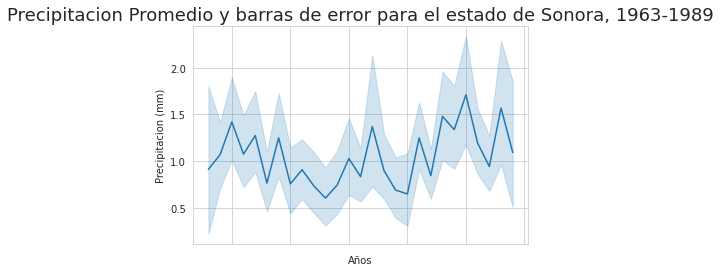

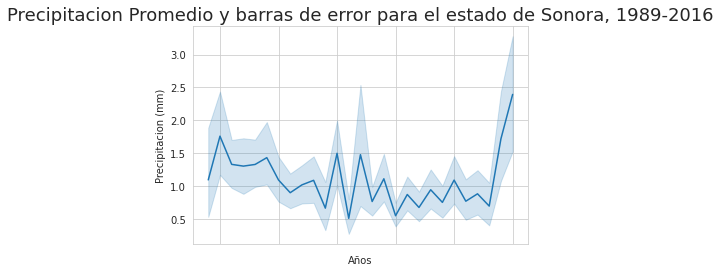

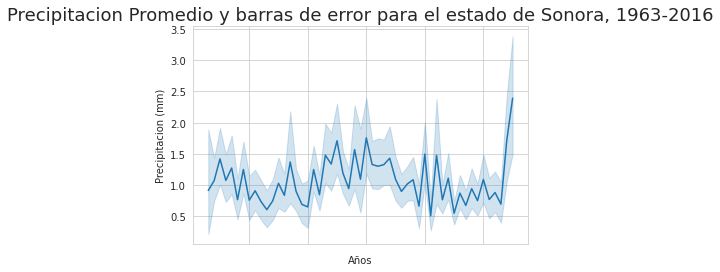

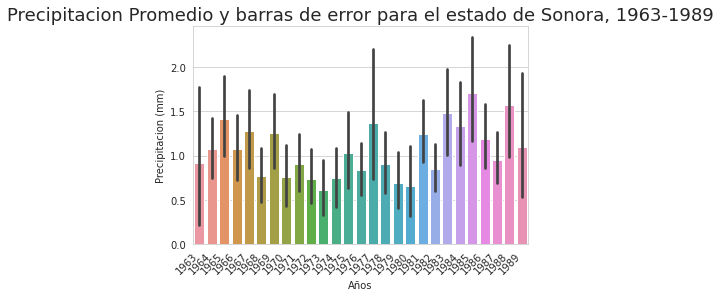

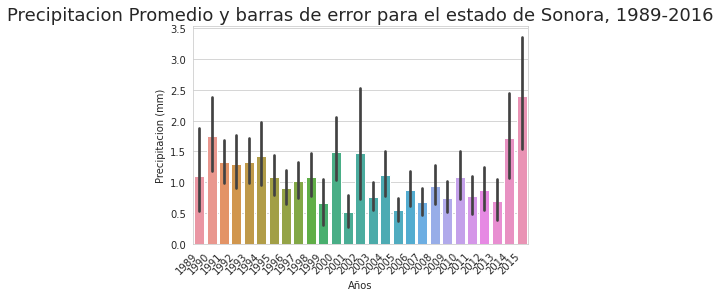

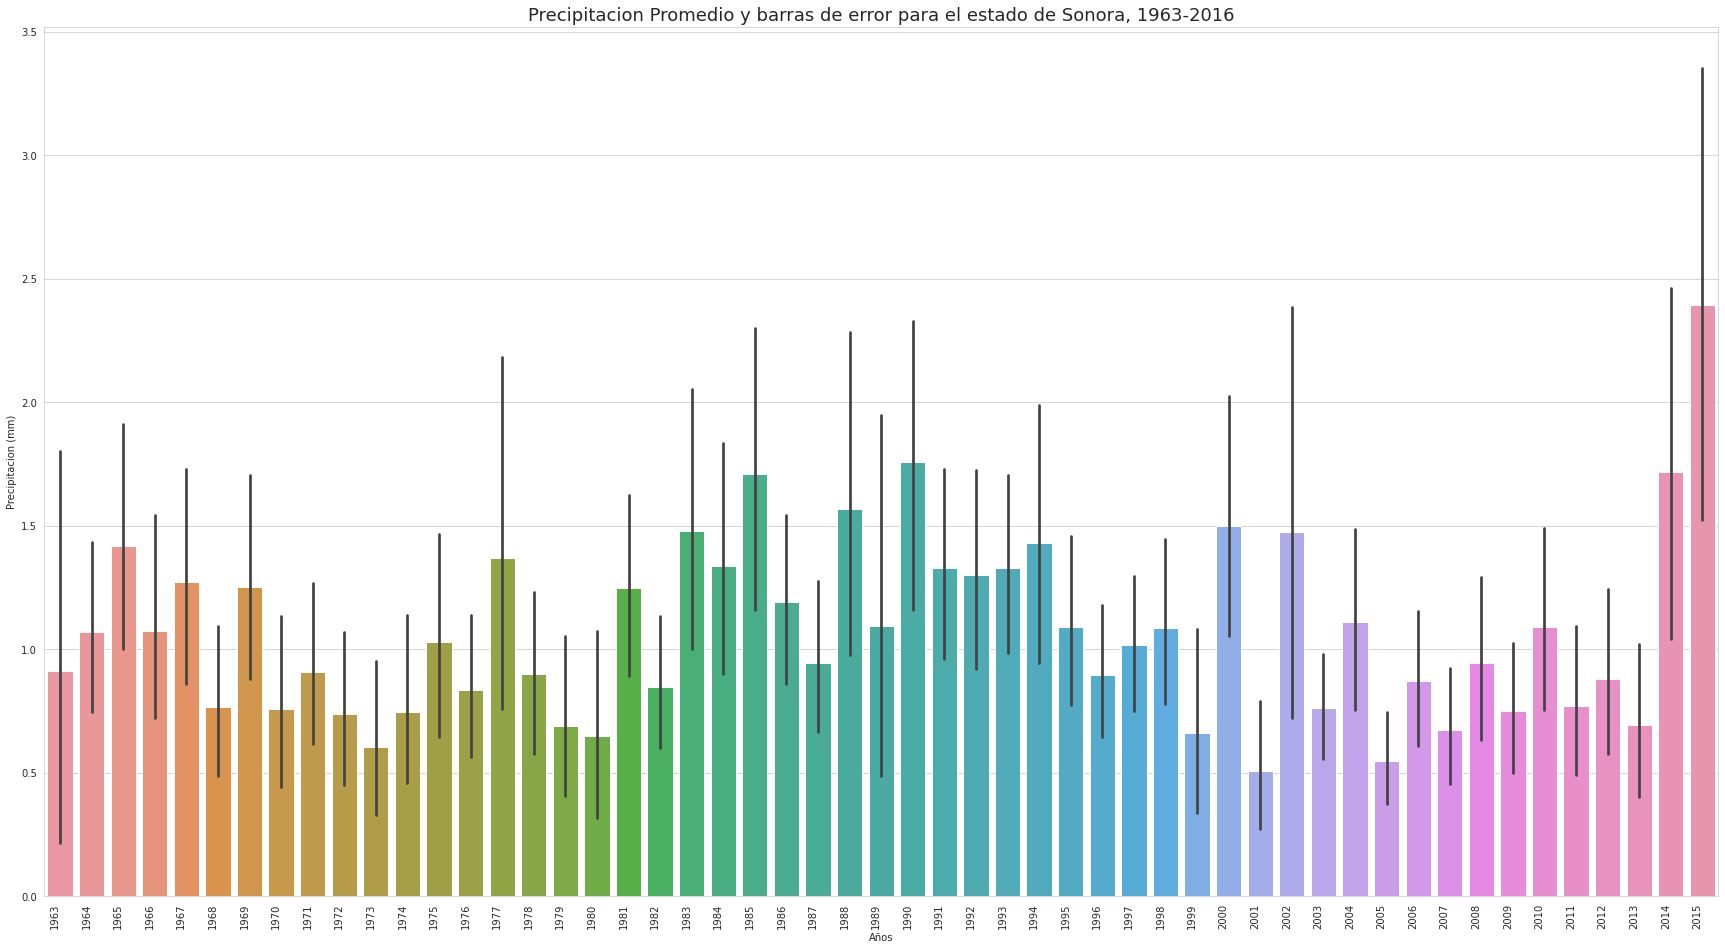

In [ ]:
df_Sonora=pd.concat([df_Nog53,df_AP47])
df_Sonora.head()

df_Sonora26=df_Sonora[(df_Sonora['Año']>=1963)&(df_Sonora['Año']<1990)]
df_Sonora27=df_Sonora[(df_Sonora['Año']>=1989)&(df_Sonora['Año']<2017)]
df_SonoraTot=df_Sonora[(df_Sonora['Año']>=1963)&(df_Sonora['Año']<2017)]


PrecipLineSonora26=sns.lineplot(x='Año',y='Precip',data=df_Sonora26);
#Rotamos 45º los Años en el eje x para mejor lectura
PrecipLineSonora26.set_xticklabels(PrecipLineSonora26.get_xticklabels(), rotation=45, horizontalalignment='right');
PrecipLineSonora26.set(xlabel='Años',ylabel='Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para el estado de Sonora, 1963-1989', fontsize=18)
plt.show()

PrecipLineSonora27=sns.lineplot(x='Año',y='Precip',data=df_Sonora27);
#Rotamos 45º los Años en el eje x para mejor lectura
PrecipLineSonora27.set_xticklabels(PrecipLineSonora27.get_xticklabels(), rotation=45, horizontalalignment='right');
PrecipLineSonora27.set(xlabel='Años',ylabel='Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para el estado de Sonora, 1989-2016', fontsize=18)
plt.show()

PrecipLineSonoraTot=sns.lineplot(x='Año',y='Precip',data=df_SonoraTot);
#Rotamos 45º los Años en el eje x para mejor lectura
PrecipLineSonoraTot.set_xticklabels(PrecipLineSonoraTot.get_xticklabels(), rotation=45, horizontalalignment='right');
PrecipLineSonoraTot.set(xlabel='Años',ylabel='Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para el estado de Sonora, 1963-2016', fontsize=18)
plt.show()


#=================GRAFICAS DE BARRAS=====================================

PrecipBarSonora26=sns.barplot(x='Año',y='Precip',data=df_Sonora26);
#Rotamos 45º los Años en el eje x para mejor lectura
PrecipBarSonora26.set_xticklabels(PrecipBarSonora26.get_xticklabels(), rotation=45, horizontalalignment='right');
PrecipBarSonora26.set(xlabel='Años',ylabel='Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para el estado de Sonora, 1963-1989', fontsize=18)
plt.show()

PrecipBarSonora27=sns.barplot(x='Año',y='Precip',data=df_Sonora27);
#Rotamos 45º los Años en el eje x para mejor lectura
PrecipBarSonora27.set_xticklabels(PrecipBarSonora27.get_xticklabels(), rotation=45, horizontalalignment='right');
PrecipBarSonora27.set(xlabel='Años',ylabel='Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para el estado de Sonora, 1989-2016', fontsize=18)
plt.show()

sns.set_style('whitegrid')
plt.figure(figsize=(30,16))
PrecipBarSonoraTot=sns.barplot(x='Año',y='Precip',data=df_SonoraTot);
#Rotamos 45º los Años en el eje x para mejor lectura
PrecipBarSonoraTot.set_xticklabels(PrecipBarSonoraTot.get_xticklabels(), rotation=90, horizontalalignment='right');
PrecipBarSonoraTot.set(xlabel='Años',ylabel='Precipitacion (mm)')
plt.title('Precipitacion Promedio y barras de error para el estado de Sonora, 1963-2016', fontsize=18)




plt.show()




